### Tensorflow Neural Network: Gender Recognition by Voice and Speech Analysis

Thank you for reviewing my Jupyter Notebook, which exhibits a neural network model I developed with Tensorflow.  The model is trained on a dataset featuring comprehensive parameters of the human voice (please review section below dedicated to describing the dataset).  Development of the nueral network was straight-forward given how lean the dataset actually is (3,168 records, 20 features) and how inherently robust neural network models are.  

Essentially, I trained a model here that will predict the gender of a speaker given these 20 voice parameters.  The end result is a model that generated predictions with 98.23% accuracy, and only 14 wrong predictions!  Pretty remarkable.  The steps to execute this model are generalized as follows: 
###### Step 1: EDA
###### Step 2: Pre-Processing
###### Step 3: Model Development
###### Step 4: Quantify the Trained Model
###### Step 5: Make Predictions
###### Step 6: Evaluate Test Results

There really wasn't much to the EDA step, except that I just took a cursory look at the features.  In the pre-processing step, I used MinMaxScaler and LabelEncoder to scale the X features and to encode the y variable, and of course TrainTestSplit to get the training and test sets (33% default split).  Model development was also simple, as it only required initiating a sequential model, compiling it, and fitting the model to the categorical X training data with 60 epochs.  Quantifying the model simply involved computing loss and accuracy using evaluate().  In the Making Predictions step, I executed such predictions on scaled test dataset, and then converted the probabilities to class labels to view predictions alongside actuals.  The final step of evaluation entailed recomputing loss and accuracy manually by first computing how many false predictions were made, and finally taking a look at a confusion matrix using Scikit-Learn.

The last thing I did was simulate saving and loading the model on new data.  For that, I attempted to leverage ChatGPT on generating a new dataset.  Loading the model on this dataset was unsuccessful, as may be predictable, as the fake dataset failed to capture real patterns that were consistent with the original dataset.  Nevertheless, a template now exists for loading in another dataset in order to test the model's effectiveness on new data.

I am proud of my work here and am excited to continue to leverage the power of deep learning for other tasks!



In [356]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [390]:
# Dependencies
import numpy as np
import pandas as pd
import tensorflow

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Voice Gender
Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

## The Dataset
The following acoustic properties of each voice are measured and included within the CSV:

* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female

In [358]:
voice = pd.read_csv('../Resources/voice.csv')
voice.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

## Data Pre-Processing

In [359]:
# set features X and predictor y
X = voice.drop("label",axis =1)
y = voice["label"]

print(X.shape,y.shape)

(3168, 20) (3168,)


In [380]:
# train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 500)

# fit X TRAINING SET only with scaler; transform X TRAINING and X TEST sets
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# ENCODE Y sets
# Step 1: Label-encode data set with LabelEncoder()
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_encoded_train = label_encoder.transform(y_train)
y_encoded_test = label_encoder.transform(y_test)


# Step 2: Convert encoded labels to one-hot-encoding using to_categorical()
y_train_categorical = to_categorical(y_encoded_train)
y_test_categorical = to_categorical(y_encoded_test)


# Create a Deep Learning Model

In [361]:
# Create neural network model and add layers
model = Sequential()
model.add(Dense(units = 100, activation = 'relu', input_dim = 20))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units=2, activation = 'softmax'))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [362]:
# Compile the model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 100)            │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,402 (48.45 KB)

 Trainable params: 12,402 (48.45 KB)

 Non-trainable params: 0 (0.00 B)

In [363]:
# Fit the model
model.fit(X_train_scaled,
          y_train_categorical,
          epochs=60,
          shuffle=2,
          verbose=2)

Epoch 1/60
75/75 - 0s - 5ms/step - accuracy: 0.7992 - loss: 0.4733
Epoch 2/60
75/75 - 0s - 432us/step - accuracy: 0.9386 - loss: 0.2113
Epoch 3/60
75/75 - 0s - 481us/step - accuracy: 0.9613 - loss: 0.1218
Epoch 4/60
75/75 - 0s - 481us/step - accuracy: 0.9697 - loss: 0.0962
Epoch 5/60
75/75 - 0s - 485us/step - accuracy: 0.9726 - loss: 0.0864
Epoch 6/60
75/75 - 0s - 480us/step - accuracy: 0.9726 - loss: 0.0871
Epoch 7/60
75/75 - 0s - 490us/step - accuracy: 0.9747 - loss: 0.0772
Epoch 8/60
75/75 - 0s - 469us/step - accuracy: 0.9722 - loss: 0.0825
Epoch 9/60
75/75 - 0s - 467us/step - accuracy: 0.9747 - loss: 0.0816
Epoch 10/60
75/75 - 0s - 469us/step - accuracy: 0.9752 - loss: 0.0755
Epoch 11/60
75/75 - 0s - 474us/step - accuracy: 0.9773 - loss: 0.0750
Epoch 12/60
75/75 - 0s - 479us/step - accuracy: 0.9743 - loss: 0.0738
Epoch 13/60
75/75 - 0s - 457us/step - accuracy: 0.9769 - loss: 0.0748
Epoch 14/60
75/75 - 0s - 503us/step - accuracy: 0.9785 - loss: 0.0707
Epoch 15/60
75/75 - 0s - 482us/

## Quantify the Trained Model

In [364]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled,
    y_test_categorical,
    verbose=2)

25/25 - 0s - 2ms/step - accuracy: 0.9823 - loss: 0.0602


## Make Predictions

In [365]:
# predictions on X_test_scaled
predictions = model.predict(X_test_scaled)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step


In [366]:
# convert probabilities to class labels
encoded_predictions = predictions.argmax(axis=-1)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [367]:
# print predictions vs. actuals
print(f'Predictions: {prediction_labels}')
print(f'Actuals: {list(y_test)}')


Predictions: ['female' 'female' 'female' 'female' 'female' 'female' 'male' 'female'
 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'male' 'male'
 'female' 'female' 'female' 'female' 'male' 'male' 'female' 'female'
 'male' 'female' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'male' 'female' 'female' 'male' 'female' 'female' 'female' 'male'
 'male' 'female' 'female' 'female' 'female' 'male' 'female' 'male'
 'female' 'male' 'female' 'male' 'female' 'female' 'male' 'male' 'female'
 'male' 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'male' 'female' 'male' 'male' 'female'
 'female' 'female' 'female' 'female' 'male' 'male' 'male' 'female'
 'female' 'male' 'female' 'male' 'female' 'male' 'female' 'male' 'female'
 'male' 'female' 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'mal

## Evaluation

In [368]:
# loss and accuracy
false_predictions = prediction_labels != y_test
num_false_predictions = np.sum(false_predictions)
totalPredictions = len(prediction_labels)

print(f'{num_false_predictions} false predictions out of {totalPredictions} predictions ---> {Counter(prediction_labels)}')
print(f'Accuracy: {round((totalPredictions-num_false_predictions) / totalPredictions * 100,2)}%')
print(f'Check Accuracy: {round(model_accuracy,4)*100}%')

14 false predictions out of 792 predictions ---> Counter({'male': 403, 'female': 389})
Accuracy: 98.23%
Check Accuracy: 98.22999999999999%


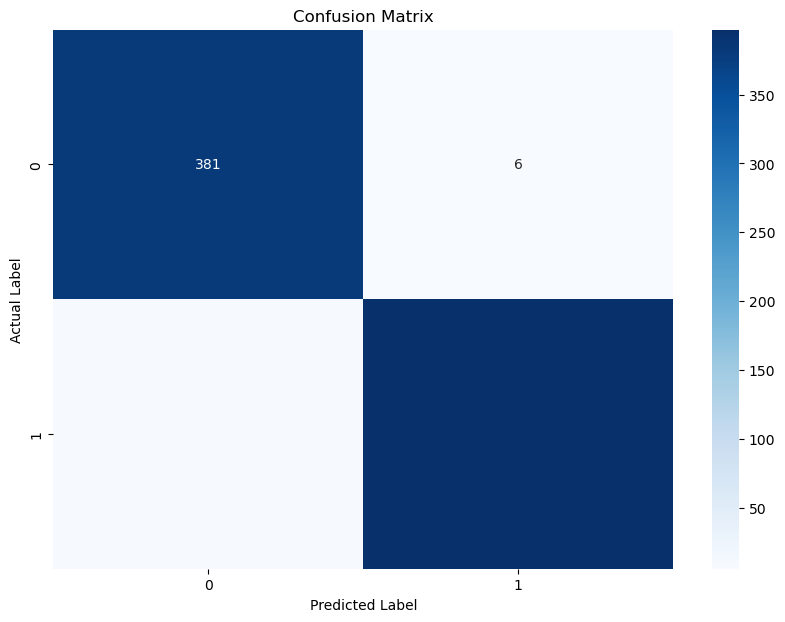

[0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1
 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0
 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0
 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1
 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1
 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0
 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0
 1 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0
 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1
 1 1 0 0 0 0 0 1 1 1 1 1 

In [369]:
# confusion matrix
cm = confusion_matrix(y_encoded_test,encoded_predictions)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

print(encoded_predictions)
print(y_encoded_test)

## Save Model

In [370]:
model.save("voice_gender_nn_model.keras")

## New Dataset: Attempt to Execute Predictive Analytics on Alternate Dataset

In [371]:
# Load in new dataset (labels randomized in new file)
voice2 = pd.read_csv('../Resources/voice2.csv')


In [372]:
# Pre-processing
X2 = voice2.drop("label",axis =1)
y2 = voice2["label"]

# train, test, split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,random_state = 2)

# fit X TRAINING SET only with scaler; transform X TRAINING and X TEST sets
X_scaler2 = MinMaxScaler().fit(X_train2)
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

# ENCODE Y sets
# Step 1: Label-encode data set with LabelEncoder()
label_encoder = LabelEncoder()
label_encoder.fit(y_train2)
y_encoded_train2 = label_encoder.transform(y_train2)
y_encoded_test2 = label_encoder.transform(y_test2)


# Step 2: Convert encoded labels to one-hot-encoding using to_categorical()
y_train_categorical2 = to_categorical(y_encoded_train2)
y_test_categorical2 = to_categorical(y_encoded_test2)



In [373]:
# Load model
model = load_model('voice_gender_nn_model.keras')


In [374]:
# Attempt predictions
predictions2 = model.predict(X_test_scaled2)
encoded_predictions2 = predictions2.argmax(axis=-1)
prediction_labels2 = label_encoder.inverse_transform(encoded_predictions2)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step


In [375]:
# Evaluate 

false_predictions2 = prediction_labels2 != y_test2
num_false_predictions2 = np.sum(false_predictions2)
totalPredictions2 = len(prediction_labels2)

print(f'{num_false_predictions2} false predictions out of {totalPredictions2} predictions ---> {Counter(prediction_labels2)}')
print(f'Accuracy: {round((totalPredictions-num_false_predictions2) / totalPredictions2 * 100,2)}%')


399 false predictions out of 792 predictions ---> Counter({'female': 425, 'male': 367})
Accuracy: 49.62%


#### FAIL (hypothesis: new dataset and unseen patterns are inconsistent with original dataset)

## Attempt to retrain new model on new data and retry predictions

In [376]:
# Create neural network model and add layers
model = Sequential()
model.add(Dense(units = 100, activation = 'relu', input_dim = 20))
model.add(Dense(units = 100, activation = 'relu'))
model.add(Dense(units=2, activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

model_loss2, model_accuracy2 = model.evaluate(
    X_test_scaled2,
    y_test_categorical2,
    verbose=2)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 100)            │         2,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 2)              │           202 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,402 (48.45 KB)

 Trainable params: 12,402 (48.45 KB)

 Non-trainable params: 0 (0.00 B)

25/25 - 0s - 3ms/step - accuracy: 0.5278 - loss: 0.7028


In [377]:
# Fit the model
model.fit(X_train_scaled2,
          y_train_categorical2,
          epochs=60,
          shuffle=2,
          verbose=2)

Epoch 1/60
75/75 - 1s - 8ms/step - accuracy: 0.5067 - loss: 0.6963
Epoch 2/60
75/75 - 0s - 424us/step - accuracy: 0.5160 - loss: 0.6912
Epoch 3/60
75/75 - 0s - 440us/step - accuracy: 0.5332 - loss: 0.6896
Epoch 4/60
75/75 - 0s - 438us/step - accuracy: 0.5349 - loss: 0.6870
Epoch 5/60
75/75 - 0s - 450us/step - accuracy: 0.5543 - loss: 0.6857
Epoch 6/60
75/75 - 0s - 442us/step - accuracy: 0.5636 - loss: 0.6816
Epoch 7/60
75/75 - 0s - 445us/step - accuracy: 0.5648 - loss: 0.6798
Epoch 8/60
75/75 - 0s - 453us/step - accuracy: 0.5694 - loss: 0.6770
Epoch 9/60
75/75 - 0s - 445us/step - accuracy: 0.5787 - loss: 0.6702
Epoch 10/60
75/75 - 0s - 452us/step - accuracy: 0.6044 - loss: 0.6644
Epoch 11/60
75/75 - 0s - 448us/step - accuracy: 0.5955 - loss: 0.6602
Epoch 12/60
75/75 - 0s - 475us/step - accuracy: 0.6136 - loss: 0.6572
Epoch 13/60
75/75 - 0s - 479us/step - accuracy: 0.6317 - loss: 0.6487
Epoch 14/60
75/75 - 0s - 508us/step - accuracy: 0.6292 - loss: 0.6447
Epoch 15/60
75/75 - 0s - 504us/

In [378]:
# Attempt predictions
predictions2 = model.predict(X_test_scaled2)
encoded_predictions2 = predictions2.argmax(axis=-1)
prediction_labels2 = label_encoder.inverse_transform(encoded_predictions2)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step


In [379]:
false_predictions2 = prediction_labels2 != y_test2
num_false_predictions2 = np.sum(false_predictions2)
totalPredictions2 = len(prediction_labels2)

print(f'{num_false_predictions2} false predictions out of {totalPredictions2} predictions ---> {Counter(prediction_labels2)}')
print(f'Accuracy: {round((totalPredictions-num_false_predictions2) / totalPredictions2 * 100,2)}%')

391 false predictions out of 792 predictions ---> Counter({'male': 419, 'female': 373})
Accuracy: 50.63%


#### ** CONCLUSION:

##### This attempt to load the model on a new dataset (i.e. "voice2.csv") was unsuccessful.  After much testing  and review, it was incontravertible that the culprit of the failed model is the dataset itself, which was auto-generated with ChatGPT in order to simulate the instance of brand new data.  This experiment aimed to ascertain whether or not this neural network model was robust to new, auto-generated data--it appears strongly conclusive that unfortunately, it is not.  Without the ability to input data that is consistent, I am unable to observe how this model performs on new data; however, performance evaluation of the first model at the top of the notebook is powerful and effective as evidenced by its loss and accuracy scores.